In [1]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt

## Q1. spread=ask_price1 - bid_price1, depth=min(bid_volume1,ask_volume1)

In [2]:
snap_data = pd.read_csv('data/002463.SZ.snap.csv')
snap_data

,trading_day,instrument_id,updatetime,trade_status,preclose,open_price,last_price,highest_price,lowest_price,average_price,...,ask_volume2,ask_volume3,ask_volume4,ask_volume5,ask_volume6,ask_volume7,ask_volume8,ask_volume9,ask_volume10,local_time
0,20230609,002463.SZ,09:15:00.000,NaN,19.83,0.0,0.00,0.00,0.0,0.0,...,0,0,0,0,0,0,0,0,0,1686273301213771
1,20230609,002463.SZ,09:15:09.000,NaN,19.83,0.0,0.00,0.00,0.0,0.0,...,0,0,0,0,0,0,0,0,0,1686273310216082
2,20230609,002463.SZ,09:15:27.000,NaN,19.83,0.0,0.00,0.00,0.0,0.0,...,0,0,0,0,0,0,0,0,0,1686273328213532
3,20230609,002463.SZ,09:15:45.000,NaN,19.83,0.0,0.00,0.00,0.0,0.0,...,0,0,0,0,0,0,0,0,0,1686273346213585
4,20230609,002463.SZ,09:16:03.000,NaN,19.83,0.0,0.00,0.00,0.0,0.0,...,0,0,0,0,0,0,0,0,0,1686273364212634
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4819,20230609,002463.SZ,14:59:24.000,NaN,19.83,19.7,21.81,21.81,19.5,0.0,...,0,0,0,0,0,0,0,0,0,1686293965216355
4820,20230609,002463.SZ,14:59:33.000,NaN,19.83,19.7,21.81,21.81,19.5,0.0,...,0,0,0,0,0,0,0,0,0,1686293974216937
4821,20230609,002463.SZ,14:59:42.000,NaN,19.83,19.7,21.81,21.81,19.5,0.0,...,0,0,0,0,0,0,0,0,0,1686293983217170
4822,20230609,002463.SZ,14:59:51.000,NaN,19.83,19.7,21.81,21.81,19.5,0.0,...,0,0,0,0,0,0,0,0,0,1686293992215905


In [3]:
snap_data['spread'] = snap_data['ask_price1'] - snap_data['bid_price1']
snap_data['depth'] = snap_data[['bid_volume1','ask_volume1']].min(axis=1)

In [6]:
def histogram_plot(df,target):
    plt.figure(figsize=(20,10))
    plt.hist(df[target])
    plt.title("Histogram for "+str(target))
    plt.tight_layout()

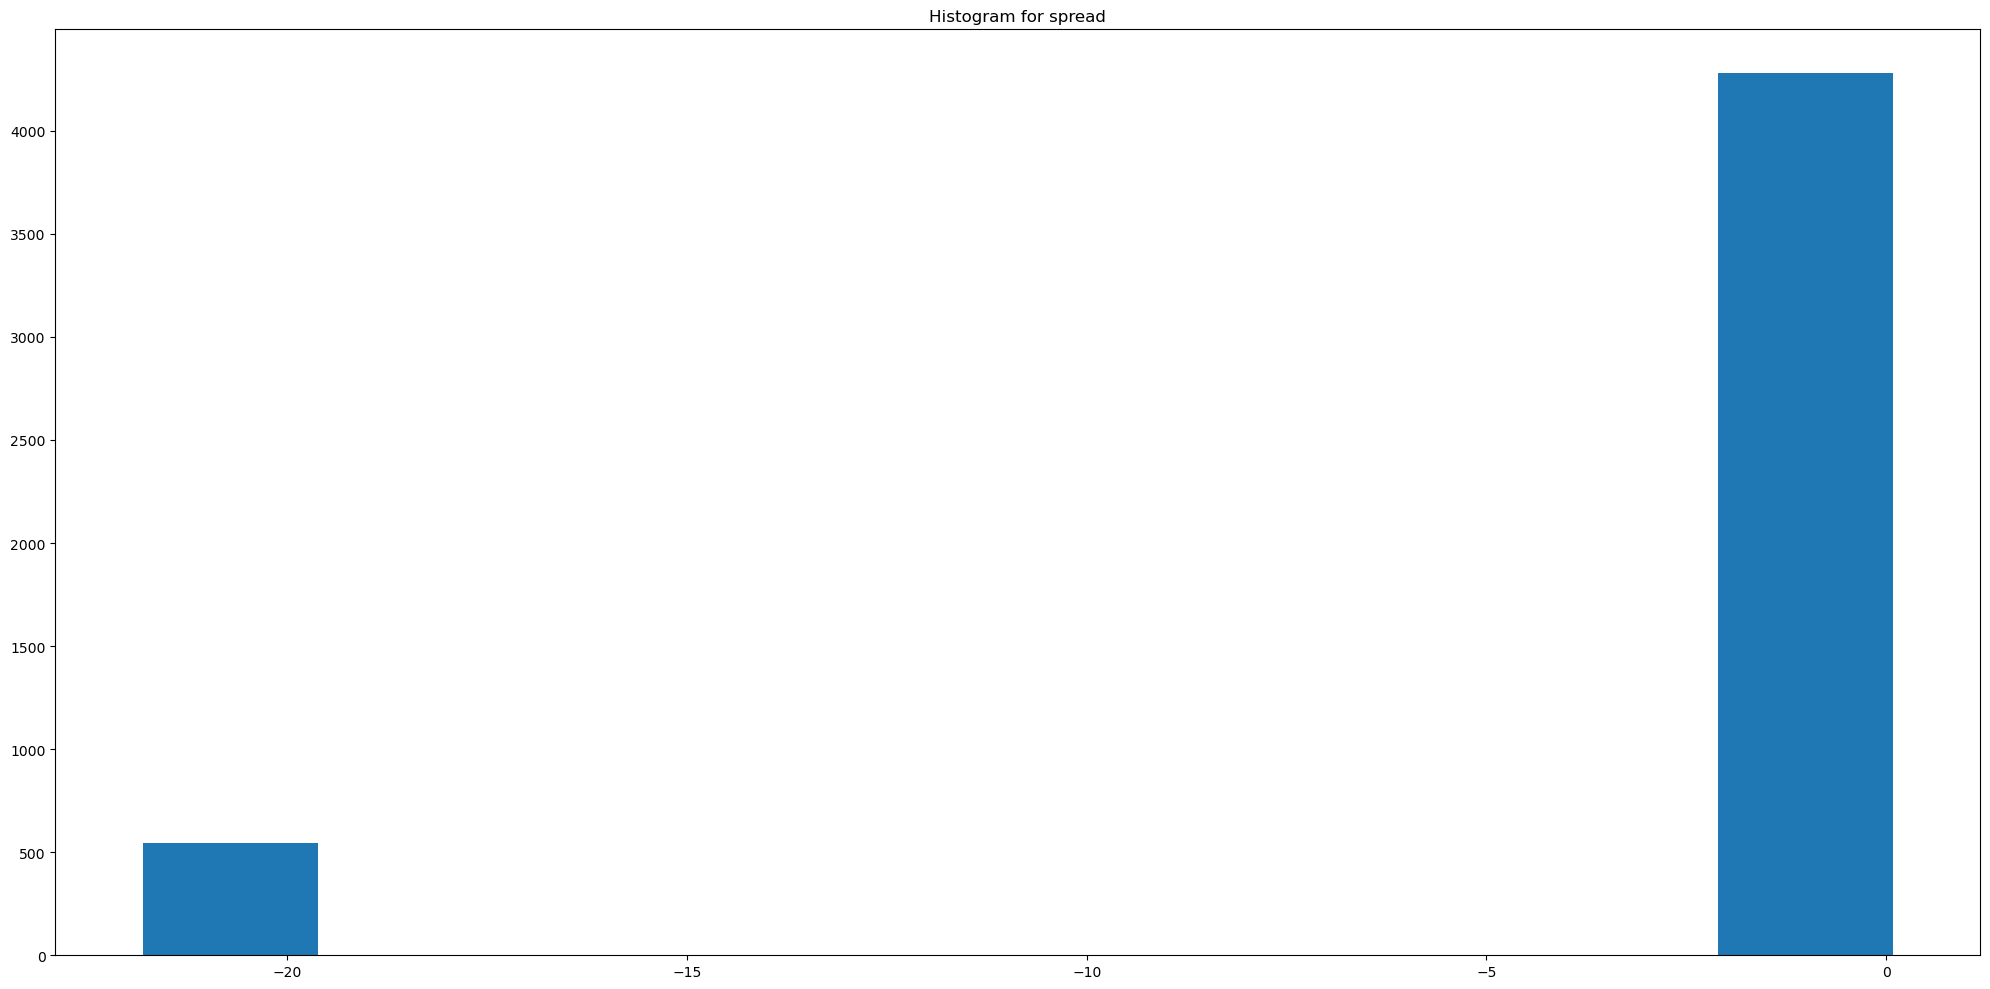

In [7]:
histogram_plot(snap_data,'spread')

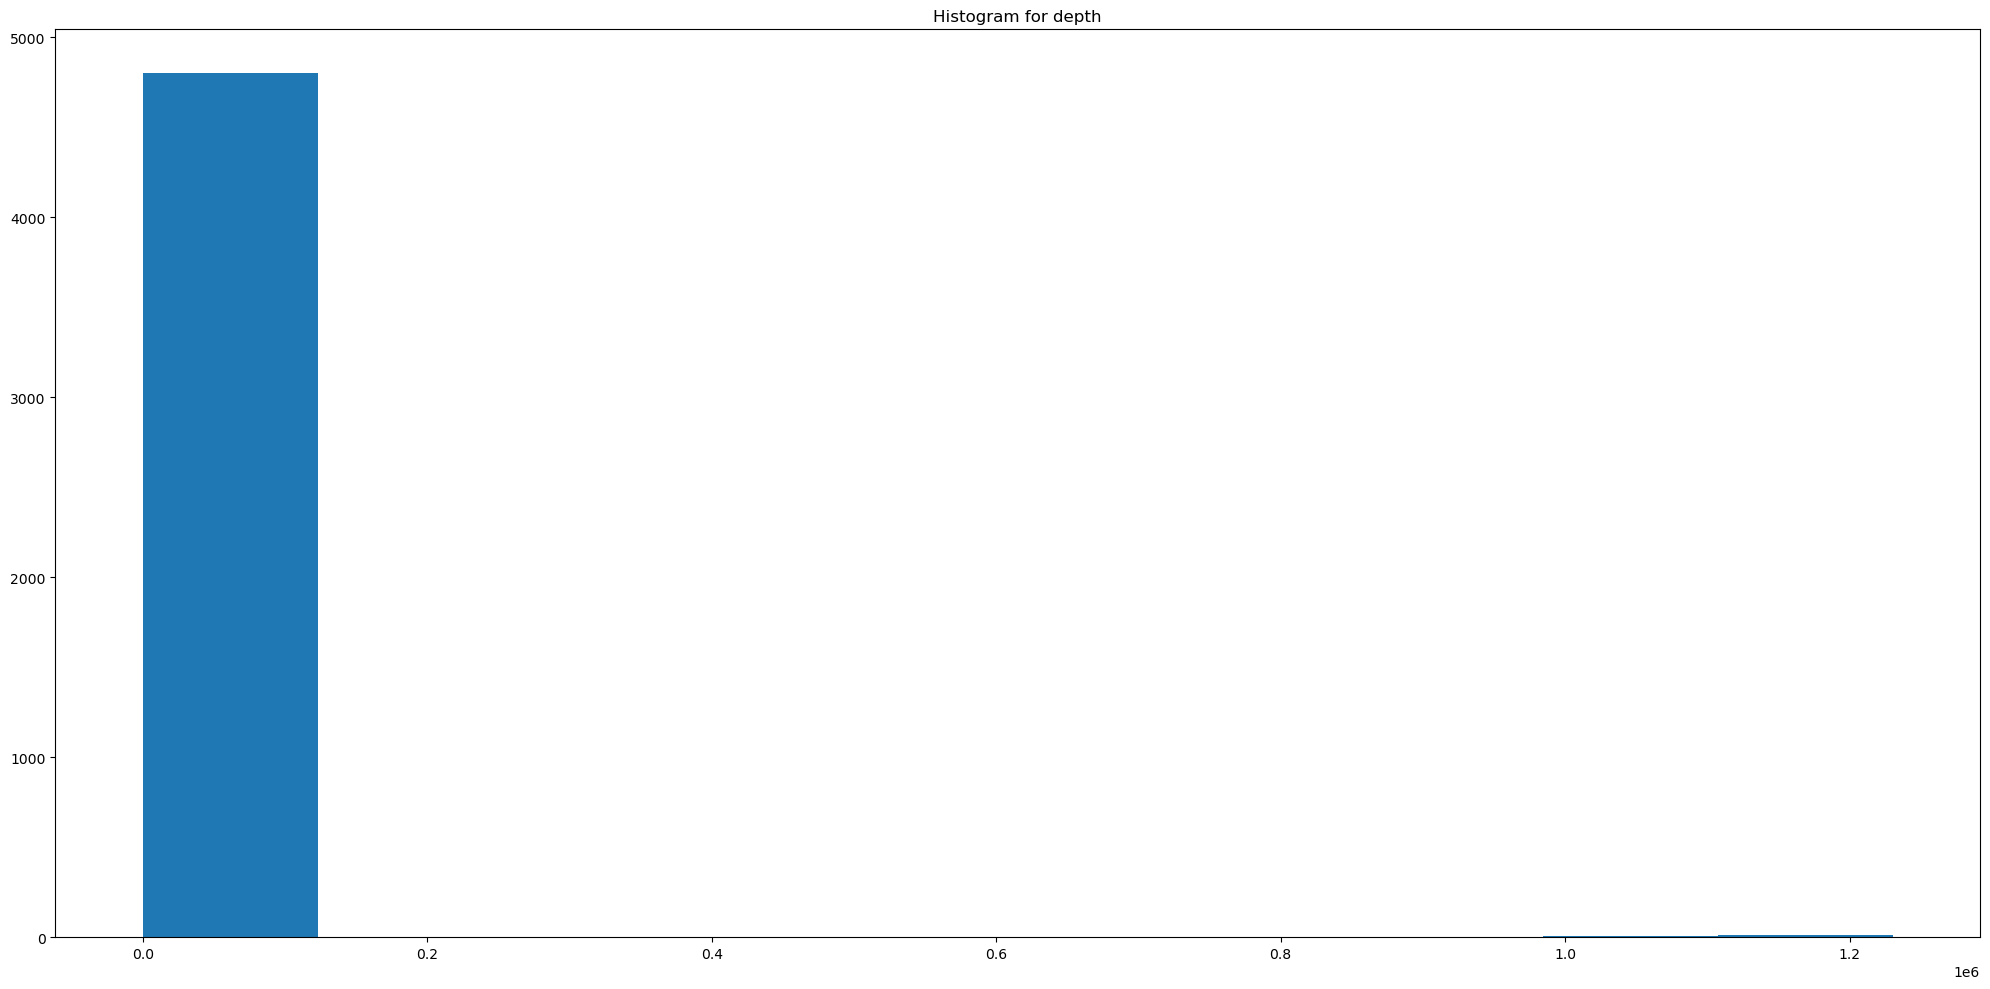

In [8]:
histogram_plot(snap_data,'depth')

## 发现
Spread：绝大多数价差都集中在靠近0的小范围内，反应市场流动性好。同时也存在价差很大的情况。
Depth：绝大多数深度都集中在靠近0的小范围内，约为0-100000，，也存在深度很大的情况（约1200000）

## Q2：计算每小时twap and vwap

In [37]:
trade_data = pd.read_csv('data/002463.SZ.trade.csv')
trade_data

,trading_day,instrument_id,updatetime,price,volume,count,buy_sys_id,sell_sys_id,direction,trade_flag,local_time
0,20230609,002463.SZ,09:15:00.300,0.00,700,0,0,34082,N,3,1686273301271178
1,20230609,002463.SZ,09:15:00.390,0.00,600,0,0,36542,N,3,1686273301442076
2,20230609,002463.SZ,09:15:01.070,0.00,7700,0,0,6008,N,3,1686273302625809
3,20230609,002463.SZ,09:15:02.090,0.00,300,0,0,132462,N,3,1686273303654670
4,20230609,002463.SZ,09:15:02.580,0.00,600,0,159692,0,N,3,1686273303940355
...,...,...,...,...,...,...,...,...,...,...,...
201804,20230609,002463.SZ,15:00:00.000,21.81,600,0,31577346,35981670,N,4,1686294001706503
201805,20230609,002463.SZ,15:00:00.000,21.81,1100,0,31577346,35983361,N,4,1686294001706504
201806,20230609,002463.SZ,15:00:00.000,21.81,1000,0,31577346,35983704,N,4,1686294001706505
201807,20230609,002463.SZ,15:00:00.000,21.81,100,0,31577346,35983834,N,4,1686294001706506


In [38]:
#选择交易时间
trade_data['updatetime'] = pd.to_datetime(trade_data['updatetime'])
trade_data = trade_data[trade_data['updatetime'].dt.time>=pd.to_datetime('09:30:00').time()]
#去掉price=0的股票
trade_data = trade_data[trade_data['price']>0]
#获取交易中每个小时数据
trade_data['hour'] = trade_data['updatetime'].dt.hour
trade_data

/var/folders/_j/x8h1yttn1s76k8f3bvjm72rw0000gn/T/ipykernel_93413/4237682013.py:2: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  trade_data['updatetime'] = pd.to_datetime(trade_data['updatetime'])


,trading_day,instrument_id,updatetime,price,volume,count,buy_sys_id,sell_sys_id,direction,trade_flag,local_time,hour
295,20230609,002463.SZ,2023-10-11 09:30:00.020,19.71,500,0,440880,333437,N,4,1686274200153087,9
296,20230609,002463.SZ,2023-10-11 09:30:00.030,19.71,500,0,442025,333437,N,4,1686274200187890,9
297,20230609,002463.SZ,2023-10-11 09:30:00.030,19.70,4100,0,327705,445274,N,4,1686274200246588,9
298,20230609,002463.SZ,2023-10-11 09:30:00.030,19.70,300,0,327705,445631,N,4,1686274200252143,9
300,20230609,002463.SZ,2023-10-11 09:30:00.040,19.70,600,0,327705,449747,N,4,1686274200340327,9
...,...,...,...,...,...,...,...,...,...,...,...,...
201804,20230609,002463.SZ,2023-10-11 15:00:00.000,21.81,600,0,31577346,35981670,N,4,1686294001706503,15
201805,20230609,002463.SZ,2023-10-11 15:00:00.000,21.81,1100,0,31577346,35983361,N,4,1686294001706504,15
201806,20230609,002463.SZ,2023-10-11 15:00:00.000,21.81,1000,0,31577346,35983704,N,4,1686294001706505,15
201807,20230609,002463.SZ,2023-10-11 15:00:00.000,21.81,100,0,31577346,35983834,N,4,1686294001706506,15


### vwap = sum(price*volume)/total volume

In [39]:
vwap = trade_data.groupby('hour').apply(lambda x:(x['price']*x['volume']).sum()/x['volume'].sum())
vwap

hour
9     19.937229
10    19.859028
11    20.256489
13    20.995403
14    21.626831
15    21.810000
dtype: float64

### twap = sum(price*time delta)/total time deltas

In [40]:
trade_data['time_delta'] = trade_data['updatetime'].diff().fillna(pd.Timedelta(seconds=0)).dt.total_seconds()
twap = trade_data.groupby('hour').apply(lambda x:(x['price']*x['time_delta']).sum()/x['time_delta'].sum())
twap

hour
9     19.934619
10    19.825461
11    20.228892
13    20.615023
14    21.632297
15    21.810000
dtype: float64

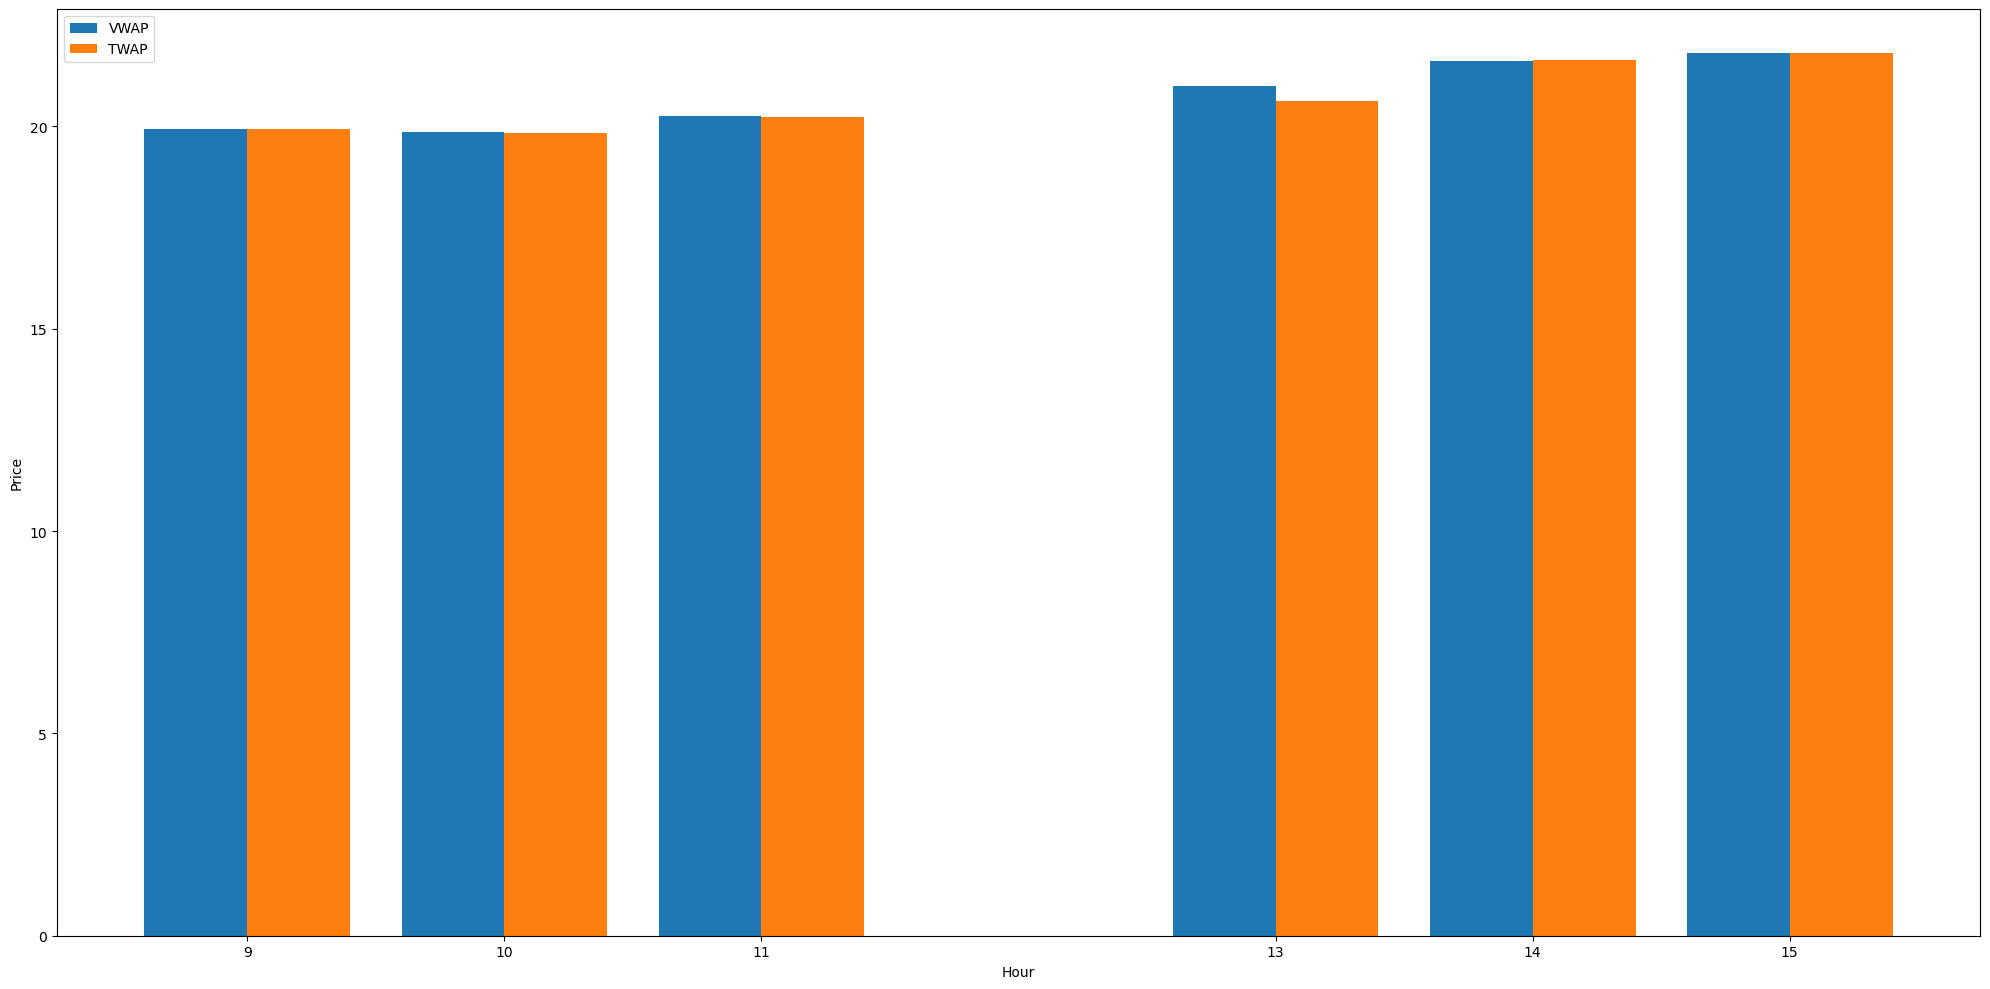

In [45]:
fig, ax = plt.subplots(figsize=(20,10))
index = vwap.index
bar1 = ax.bar(index-0.2,vwap,0.4,label='VWAP')
bar2 = ax.bar(index+0.2,twap,0.4,label='TWAP')
ax.set_xlabel('Hour')
ax.set_ylabel('Price')
ax.set_xticks(index)
ax.legend()
plt.tight_layout()

### 注意，上图将15：00：00的交易纳入

## Q3 snap的midprice和trade的price

In [47]:
snap_data

,trading_day,instrument_id,updatetime,trade_status,preclose,open_price,last_price,highest_price,lowest_price,average_price,...,ask_volume4,ask_volume5,ask_volume6,ask_volume7,ask_volume8,ask_volume9,ask_volume10,local_time,spread,depth
0,20230609,002463.SZ,09:15:00.000,NaN,19.83,0.0,0.00,0.00,0.0,0.0,...,0,0,0,0,0,0,0,1686273301213771,0.00,3300
1,20230609,002463.SZ,09:15:09.000,NaN,19.83,0.0,0.00,0.00,0.0,0.0,...,0,0,0,0,0,0,0,1686273310216082,0.00,3700
2,20230609,002463.SZ,09:15:27.000,NaN,19.83,0.0,0.00,0.00,0.0,0.0,...,0,0,0,0,0,0,0,1686273328213532,0.00,4100
3,20230609,002463.SZ,09:15:45.000,NaN,19.83,0.0,0.00,0.00,0.0,0.0,...,0,0,0,0,0,0,0,1686273346213585,0.00,4300
4,20230609,002463.SZ,09:16:03.000,NaN,19.83,0.0,0.00,0.00,0.0,0.0,...,0,0,0,0,0,0,0,1686273364212634,0.00,4300
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4819,20230609,002463.SZ,14:59:24.000,NaN,19.83,19.7,21.81,21.81,19.5,0.0,...,0,0,0,0,0,0,0,1686293965216355,0.00,1170498
4820,20230609,002463.SZ,14:59:33.000,NaN,19.83,19.7,21.81,21.81,19.5,0.0,...,0,0,0,0,0,0,0,1686293974216937,0.00,1193328
4821,20230609,002463.SZ,14:59:42.000,NaN,19.83,19.7,21.81,21.81,19.5,0.0,...,0,0,0,0,0,0,0,1686293983217170,0.00,1217528
4822,20230609,002463.SZ,14:59:51.000,NaN,19.83,19.7,21.81,21.81,19.5,0.0,...,0,0,0,0,0,0,0,1686293992215905,0.00,1230128


这里假设snap的mid price为ask_price1，bid_price1的平均数

In [51]:
snap_data['mid_price'] = (snap_data['ask_price1']+snap_data['bid_price1'])/2
snap_data['updatetime'] = pd.to_datetime(snap_data['updatetime'])

/var/folders/_j/x8h1yttn1s76k8f3bvjm72rw0000gn/T/ipykernel_93413/889474105.py:2: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  snap_data['updatetime'] = pd.to_datetime(snap_data['updatetime'])


In [56]:
snap_data_trading_time = snap_data[snap_data['updatetime'].dt.time>=pd.to_datetime('09:30:00').time()]
snap_data_trading_time = snap_data_trading_time[snap_data_trading_time['mid_price']>0]
snap_data_trading_time

,trading_day,instrument_id,updatetime,trade_status,preclose,open_price,last_price,highest_price,lowest_price,average_price,...,ask_volume5,ask_volume6,ask_volume7,ask_volume8,ask_volume9,ask_volume10,local_time,spread,depth,mid_price
62,20230609,002463.SZ,2023-10-11 09:30:00,NaN,19.83,19.7,19.82,19.82,19.7,0.0,...,3100,3500,700,2300,6600,7400,1686274201483435,0.01,600,19.825
63,20230609,002463.SZ,2023-10-11 09:30:03,NaN,19.83,19.7,19.71,19.85,19.7,0.0,...,53300,8500,3200,600,300,3500,1686274204555063,0.08,200,19.760
64,20230609,002463.SZ,2023-10-11 09:30:06,NaN,19.83,19.7,19.80,19.85,19.7,0.0,...,53600,7500,3300,600,300,3500,1686274207531219,0.02,600,19.810
65,20230609,002463.SZ,2023-10-11 09:30:09,NaN,19.83,19.7,19.82,19.85,19.7,0.0,...,53600,7500,3300,1100,300,3500,1686274210509923,0.01,100,19.815
66,20230609,002463.SZ,2023-10-11 09:30:12,NaN,19.83,19.7,19.80,19.85,19.7,0.0,...,7500,3300,1100,300,3500,5600,1686274213487965,0.04,900,19.820
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4819,20230609,002463.SZ,2023-10-11 14:59:24,NaN,19.83,19.7,21.81,21.81,19.5,0.0,...,0,0,0,0,0,0,1686293965216355,0.00,1170498,21.810
4820,20230609,002463.SZ,2023-10-11 14:59:33,NaN,19.83,19.7,21.81,21.81,19.5,0.0,...,0,0,0,0,0,0,1686293974216937,0.00,1193328,21.810
4821,20230609,002463.SZ,2023-10-11 14:59:42,NaN,19.83,19.7,21.81,21.81,19.5,0.0,...,0,0,0,0,0,0,1686293983217170,0.00,1217528,21.810
4822,20230609,002463.SZ,2023-10-11 14:59:51,NaN,19.83,19.7,21.81,21.81,19.5,0.0,...,0,0,0,0,0,0,1686293992215905,0.00,1230128,21.810


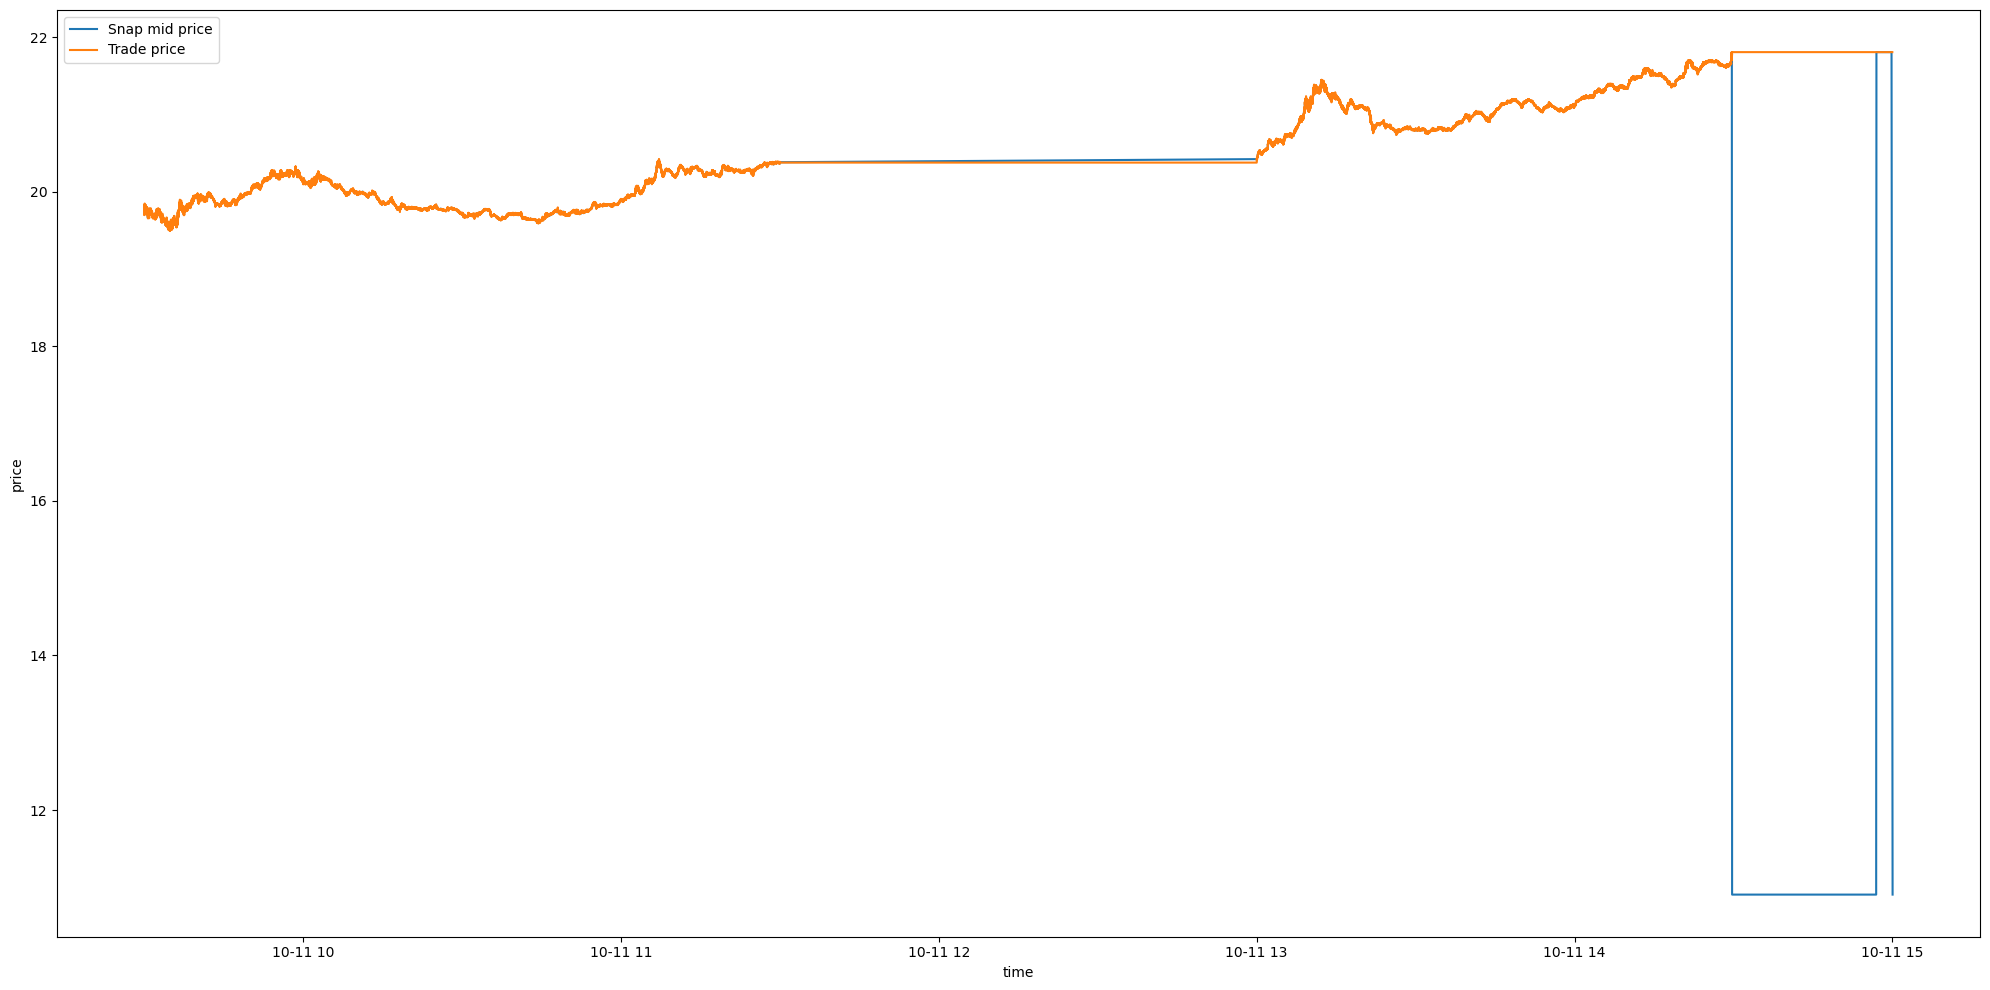

In [61]:
fig,ax = plt.subplots(figsize=(20,10))
ax.plot(snap_data_trading_time['updatetime'],snap_data_trading_time['mid_price'],label='Snap mid price')
ax.plot(trade_data['updatetime'],trade_data['price'],label = 'Trade price')
ax.set_xlabel('time')
ax.set_ylabel('price')
ax.legend()
plt.tight_layout()